In [3]:
# import libraries for spatial data (geopandas), plotting (matplotlib.pyplot), network analysis (networkx)
# street network analysis (osmnx), and basemaps (contextily)

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [6]:
# defining place, network type (walk v. bike), trip times, and mode speed
address = 'Beverly Grove, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15] #in minutes
meters_per_minute = 75 #walking speed in meters per minute

In [11]:
%%time

# downloading street network using .graph_from_place
G = ox.graph_from_address(address, network_type=network_type, dist=2500)

CPU times: user 7.53 s, sys: 120 ms, total: 7.64 s
Wall time: 20.6 s


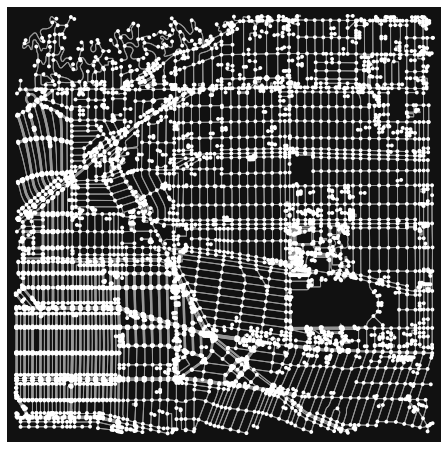

In [12]:
# plotting using osmnx
fig, ax = ox.plot_graph(G)

In [13]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [14]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [15]:
ints = ox.distance.nearest_nodes(G,Y=4039016.9436932555,X=-13177625.096784925)
print('The ID for the nearest node is ' + str(ints))

The ID for the nearest node is 18166155


In [16]:
# using the lengths column (which is in meters) let's calculate and add another column for walk times
gdf_edges['walk_times'] = gdf_edges['length']/meters_per_minute

In [17]:
# adding colors to each trip time
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15]
['#0d0887', '#cc4778', '#f0f921']


In [18]:
# reversing order of colors so dark=long
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[15, 10, 5]
['#0d0887', '#cc4778', '#f0f921']


In [19]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(15, '#0d0887'), (10, '#cc4778'), (5, '#f0f921')]

In [20]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 15 minutes is #0d0887
The color for 10 minutes is #cc4778
The color for 5 minutes is #f0f921


In [22]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, ints, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 673 nodes within 15 minutes 
There are 267 nodes within 10 minutes 
There are 49 nodes within 5 minutes 


In [23]:
# the NaN values then need to be populated with a valid color
gdf_nodes['color'].fillna('#cccccc', inplace=True)

<AxesSubplot:>

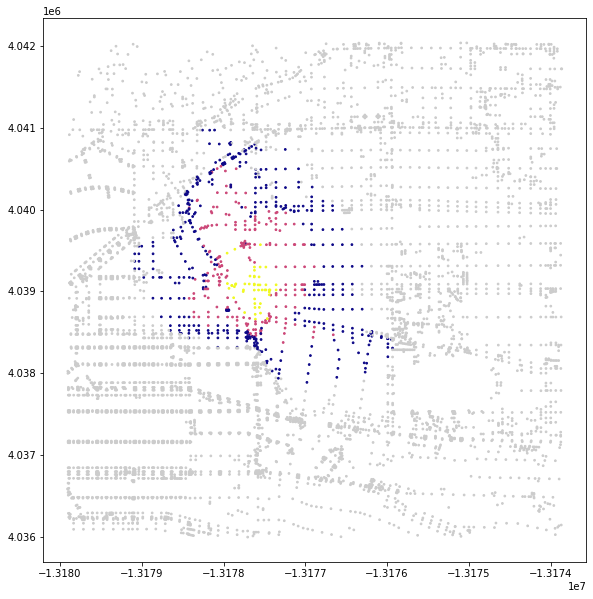

In [24]:
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

In [25]:
# show only the points within 5 minutes
gdf_nodes[gdf_nodes['time']=='5 mins']

,y,x,highway,street_count,lon,lat,geometry,time,color
osmid,,,,,,,,,
18166155,4.039015e+06,-1.317762e+07,traffic_signals,4,-118.376608,34.076029,POINT (-13177623.702 4039015.438),5 mins,#f0f921
5185096608,4.038907e+06,-1.317762e+07,NaN,3,-118.376571,34.075225,POINT (-13177619.650 4038907.330),5 mins,#f0f921
612935979,4.039079e+06,-1.317762e+07,NaN,3,-118.376606,34.076503,POINT (-13177623.546 4039079.182),5 mins,#f0f921
7608032212,4.039016e+06,-1.317757e+07,NaN,3,-118.376141,34.076034,POINT (-13177571.738 4039016.123),5 mins,#f0f921
8248278296,4.039018e+06,-1.317776e+07,NaN,3,-118.377796,34.076045,POINT (-13177755.972 4039017.561),5 mins,#f0f921
123230494,4.039515e+06,-1.317786e+07,stop,4,-118.378743,34.079746,POINT (-13177861.347 4039515.012),5 mins,#f0f921
122824039,4.039467e+06,-1.317796e+07,stop,4,-118.379593,34.079390,POINT (-13177955.980 4039467.192),5 mins,#f0f921
612935982,4.039080e+06,-1.317736e+07,NaN,4,-118.374211,34.076510,POINT (-13177356.903 4039080.069),5 mins,#f0f921
122736531,4.039297e+06,-1.317748e+07,NaN,4,-118.375337,34.078124,POINT (-13177482.226 4039297.014),5 mins,#f0f921


In [26]:
# put it in a variable
gdf_5 = gdf_nodes[gdf_nodes['time']=='5 mins']

<AxesSubplot:>

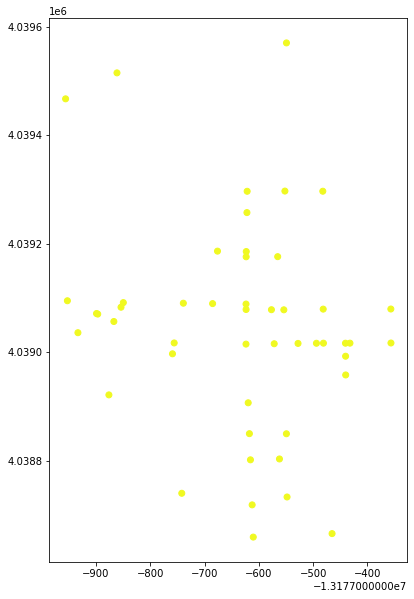

In [27]:
# plot it
gdf_5.plot(figsize=(10,10),color=gdf_5.color)

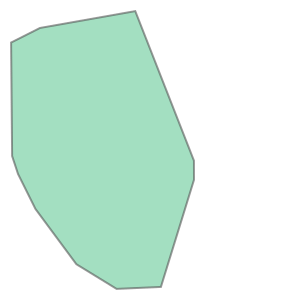

In [28]:
# combine all the points (unary_union) and create a convex hull polygon
gdf_5.unary_union.convex_hull

In [29]:
# dissolve the nodes by time
isochrones = gdf_nodes.dissolve("time")
isochrones

,geometry,y,x,highway,street_count,lon,lat,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13178419.970 4038914.305, -131784...",4.039572e+06,-1.317703e+07,traffic_signals,3,-118.371234,34.080168,#cc4778
15 mins,"MULTIPOINT (-13179085.884 4039458.778, -131790...",4.039736e+06,-1.317850e+07,traffic_signals,3,-118.384501,34.081387,#0d0887
5 mins,"MULTIPOINT (-13177955.980 4039467.192, -131779...",4.039015e+06,-1.317762e+07,traffic_signals,4,-118.376608,34.076029,#f0f921


In [30]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-13177270.285 4038374.736, -13177626..."
1,15 mins,"POLYGON ((-13176979.986 4037887.078, -13177329..."
2,5 mins,"POLYGON ((-13177610.310 4038659.979, -13177741..."


In [31]:
# geometry header has been automatically named "0"
# let's rename that
isochrones.columns=['time','geometry']

<AxesSubplot:>

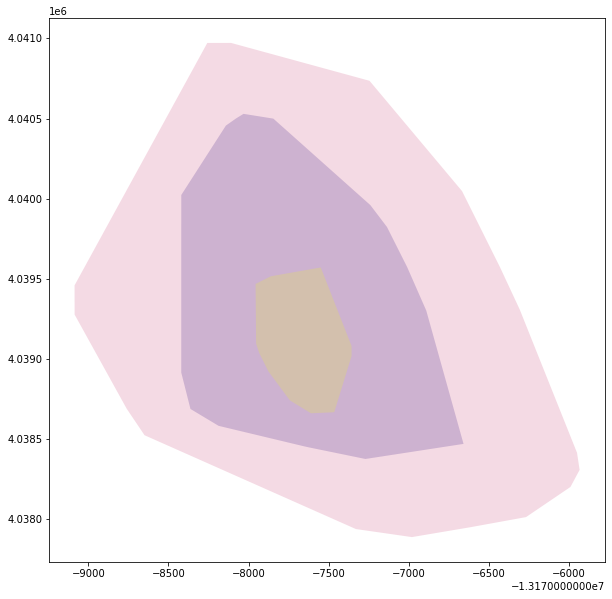

In [32]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

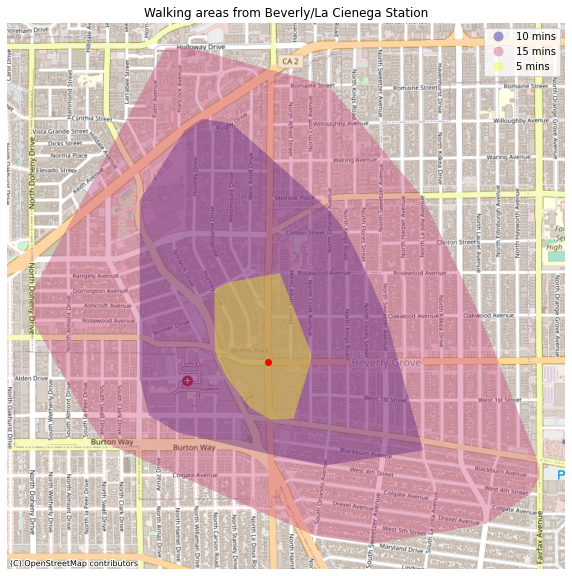

In [33]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[ints]].plot(ax=ax,color='r', zorder=30)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from Beverly/La Cienega Station')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

#### Code for finding nodes nearest both stations
ints1 = ox.distance.nearest_nodes(G,Y=4039017.8956741537,X=-13177624.649093205) <br>
print('The ID for the nearest node is ' + str(ints1))<br>
ints2 = ox.distance.nearest_nodes(G,Y=4040208.074389142,X=-13178455.01868442)<br>
print('The ID for the nearest node is ' + str(ints2))